In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.utils import resample

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn. preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [121]:
data = pd.read_csv('/content/drive/MyDrive/News/output.csv')

In [122]:
data.head(6)

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
5,https://www.huffpost.com/entry/belk-worker-fou...,Cleaner Was Dead In Belk Bathroom For 4 Days B...,U.S. NEWS,The 63-year-old woman was seen working at the ...,NaN,2022-09-22


In [123]:
category=data['category'].value_counts()
print(category)

POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATION       

In [124]:
data.drop(['link','date'],axis=1,inplace = True)
data.head(4)

,headline,category,short_description,authors
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP"
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel
3,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna


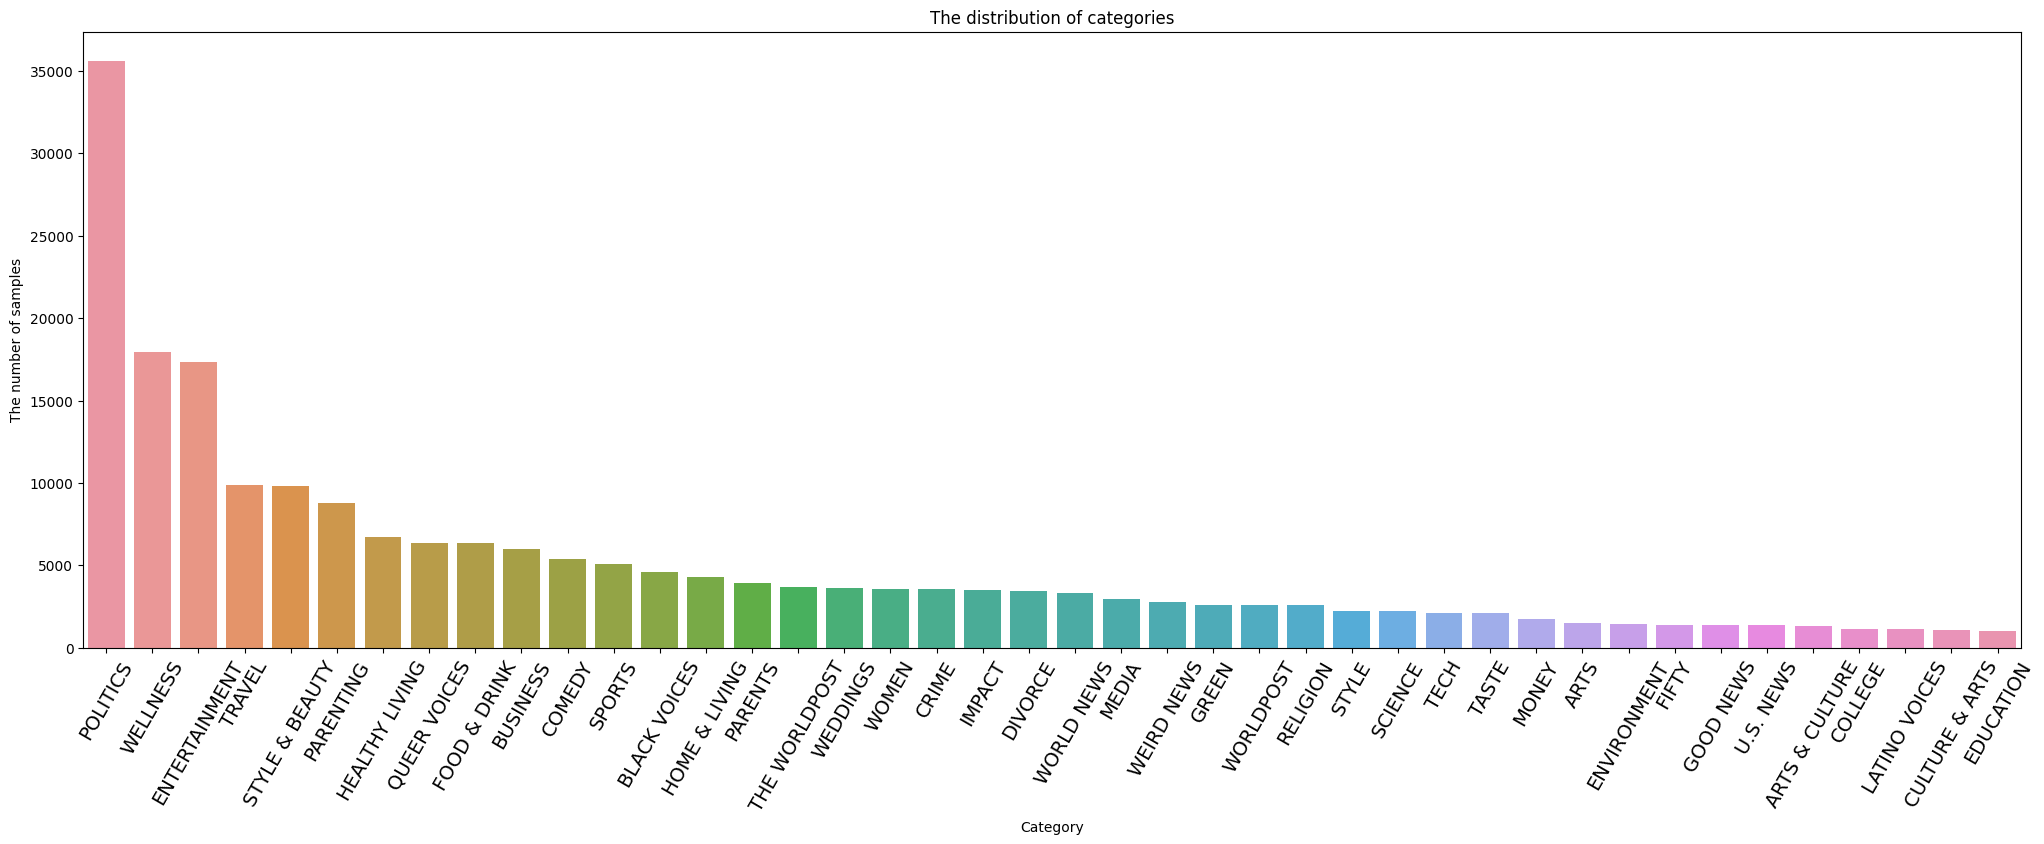

In [125]:
plt.figure(figsize=(25,8))
sns.barplot(x=category.index,y=category.values)
plt.title("The distribution of categories")
plt.xlabel("Category")
plt.ylabel("The number of samples")

plt.xticks(rotation=60,fontsize = 14)
plt.show()

In [126]:
data.duplicated().sum()

447

In [127]:
data.drop_duplicates(keep='last',inplace=True)

In [128]:
data.duplicated(subset=['headline', 'short_description']).sum()

42

In [129]:
data.drop_duplicates(subset=['headline', 'short_description'],inplace=True,keep='last')

In [130]:
print("THe length of the datset after dublicate deletion------>",data.shape)

THe length of the datset after dublicate deletion------> (209038, 4)


In [131]:
data.isnull().sum()

headline                 2
category                 0
short_description    19611
authors              37312
dtype: int64

In [132]:
print("The shape of the dataset-------->",data.shape)
print("The number of null values ------>")
print(data.isnull().sum())
column = data.columns
print("The column present there-------->",column)

The shape of the dataset--------> (209038, 4)
The number of null values ------>
headline                 2
category                 0
short_description    19611
authors              37312
dtype: int64
The column present there--------> Index(['headline', 'category', 'short_description', 'authors'], dtype='object')


In [133]:
description_blank = data['short_description']==''
print("the lenth of the blank description samples----->",len(data[description_blank]))
data = data[~description_blank]
print("THe length of the datset ---------------------->",data.shape)

the lenth of the blank description samples-----> 0
THe length of the datset ----------------------> (209038, 4)


In [134]:
author_blank = data['authors']==''
print("the lenth of the blank auhtor samples---------->",len(data[author_blank]))
data = data[~author_blank]
print("THe length of the datset ---------------------->",data.shape)

the lenth of the blank auhtor samples----------> 0
THe length of the datset ----------------------> (209038, 4)


In [135]:
data.drop(['authors'],axis=1,inplace = True)
data.head(4)

,headline,category,short_description
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha..."
3,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to..."


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209038 entries, 0 to 209526
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   headline           209036 non-null  object
 1   category           209038 non-null  object
 2   short_description  189427 non-null  object
dtypes: object(3)
memory usage: 6.4+ MB


In [137]:
data.dropna(subset=['headline','short_description'],inplace=True)


In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189426 entries, 0 to 209526
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   headline           189426 non-null  object
 1   category           189426 non-null  object
 2   short_description  189426 non-null  object
dtypes: object(3)
memory usage: 5.8+ MB


In [139]:
cateo_keep = (data['category'] == 'POLITICS') | (data['category'] == 'WELLNESS' )| (data['category'] == 'ENTERTAINMENT') | (data['category'] == 'TRAVEL') | \
            (data['category'] == 'STYLE & BEAUTY') | (data['category'] == 'PARENTING' )| (data['category'] == 'HEALTHY LIVING') | (data['category'] == 'QUEER VOICES') | \
              (data['category'] == 'FOOD & DRINK') | (data['category'] == 'BUSINESS' )| (data['category'] == 'COMEDY') | (data['category'] == 'PARENTS') | (data['category'] == 'SPORTS') | (data['category'] == 'HOME & LIVING' )| (data['category'] == 'BLACK VOICES') | \
              (data['category'] == 'EDUCATION') | (data['category'] == 'TECH') | (data['category'] == 'CRIME') | (data['category'] == 'COLLEGE') | (data['category'] == 'SCIENCE') | (data['category'] == 'WOMEN')
data = data[cateo_keep]

In [140]:
category = data['category'].value_counts()
category

POLITICS          32425
WELLNESS          17938
ENTERTAINMENT     14772
STYLE & BEAUTY     9665
TRAVEL             9418
PARENTING          8762
FOOD & DRINK       6331
QUEER VOICES       5601
HEALTHY LIVING     5264
BUSINESS           5130
COMEDY             4642
SPORTS             4414
HOME & LIVING      4282
BLACK VOICES       4174
PARENTS            3516
WOMEN              3136
CRIME              2831
TECH               2054
SCIENCE            1803
COLLEGE             921
EDUCATION           902
Name: category, dtype: int64

In [141]:
data_1 = data[data['category'] == 'POLITICS']
data_1 = resample(data_1, replace=False, n_samples=3000, random_state=123)
data_2 = data[data['category'] == 'WELLNESS']
data_2 = resample(data_2, replace=False, n_samples=3000, random_state=123)
data_3 = data[data['category'] == 'ENTERTAINMENT']
data_3 = resample(data_3, replace=False, n_samples=3000, random_state=123)
data_4 = data[data['category'] == 'TRAVEL']
data_4 = resample(data_4, replace=False, n_samples=3000, random_state=123)
data_5 = data[data['category'] == 'STYLE & BEAUTY']
data_5 = resample(data_5, replace=False, n_samples=3000, random_state=123)
data_6 = data[data['category'] == 'PARENTING']
data_6 = resample(data_6, replace=False, n_samples=3000, random_state=123)
data_7 = data[data['category'] == 'HEALTHY LIVING']
data_7 = resample(data_7, replace=False, n_samples=3000, random_state=123)
data_8 = data[data['category'] == 'QUEER VOICES']
data_8 = resample(data_8, replace=False, n_samples=3000, random_state=123)
data_9 = data[data['category'] == 'FOOD & DRINK']
data_9 = resample(data_9, replace=False, n_samples=3000, random_state=123)
data_10 = data[data['category'] == 'BUSINESS']
data_10 = resample(data_10, replace=False, n_samples=3000, random_state=123)
data_11 = data[data['category'] == 'COMEDY']
data_11 = resample(data_11, replace=False, n_samples=3000, random_state=123)
data_12= data[data['category'] == 'PARENTS']
data_12 = resample(data_12, replace=False, n_samples=3000, random_state=123)
data_13= data[data['category'] == 'SPORTS']
data_13 = resample(data_13, replace=False, n_samples=3000, random_state=123)
data_14 = data[data['category'] == 'HOME & LIVING']
data_14 = resample(data_14, replace=False, n_samples=3000, random_state=123)
data_15 = data[data['category'] == 'BLACK VOICES']
data_15 = resample(data_15, replace=False, n_samples=3000, random_state=123)
data_16 = data[data['category'] == 'EDUCATION']
data_16 = resample(data_16, replace=False, n_samples=200, random_state=123)
data_17 = data[data['category'] == 'TECH']
data_17 = resample(data_17, replace=False, n_samples=2050, random_state=123)
data_18 = data[data['category'] == 'CRIME']
data_18 = resample(data_18, replace=False, n_samples=2830, random_state=123)
data_19 = data[data['category'] == 'COLLEGE']
data_19 = resample(data_19, replace=False, n_samples=920, random_state=123)
data_20 = data[data['category'] == 'SCIENCE']
data_20 = resample(data_20, replace=False, n_samples=1800, random_state=123)
data_21 = data[data['category'] == 'WOMEN']
data_21 = resample(data_21, replace=False, n_samples=3000, random_state=123)

cato_list = [data_1 , data_2 , data_3 , data_4 ,data_5 , data_6 , data_7, data_8 , data_9 , data_10, data_11 , data_12 , data_13, data_14 ,data_15,data_16,data_17,data_18,data_19,data_20,data_21]

data = pd.concat(cato_list)
data['category'].value_counts()

POLITICS          3000
FOOD & DRINK      3000
BLACK VOICES      3000
HOME & LIVING     3000
SPORTS            3000
PARENTS           3000
WELLNESS          3000
BUSINESS          3000
COMEDY            3000
QUEER VOICES      3000
HEALTHY LIVING    3000
PARENTING         3000
STYLE & BEAUTY    3000
TRAVEL            3000
ENTERTAINMENT     3000
WOMEN             3000
CRIME             2830
TECH              2050
SCIENCE           1800
COLLEGE            920
EDUCATION          200
Name: category, dtype: int64

In [142]:
data['text'] = data['headline']+'-'+data['short_description']
data.head(5)

,headline,category,short_description,text
64888,Iowa Senator Doesn’t Want Anyone Forcing Soldi...,POLITICS,Joni Ernst considers lunch a matter of nationa...,Iowa Senator Doesn’t Want Anyone Forcing Soldi...
89468,Heroin Epidemic Stars In Conservative Ad Again...,POLITICS,"Union president says he's ""literally disgusted...",Heroin Epidemic Stars In Conservative Ad Again...
61502,Trump Eyes Fracking Mogul Harold Hamm As Energ...,POLITICS,Hamm would add to Trump's roster of fossil fue...,Trump Eyes Fracking Mogul Harold Hamm As Energ...
42004,Hands Off Medicare And Medicaid Tour: Find Thr...,POLITICS,Video by Portland Press Herald Nobody voted to...,Hands Off Medicare And Medicaid Tour: Find Thr...
1978,Boxer-Senator Manny Pacquiao To Run For Philip...,POLITICS,"“I am a fighter, and I will always be a fighte...",Boxer-Senator Manny Pacquiao To Run For Philip...


In [143]:
data.drop(['headline','short_description'],axis=1,inplace=True)

In [144]:
print("The lenth of the datset-------------------->",data.shape)
data.head(4)

The lenth of the datset--------------------> (55800, 2)


,category,text
64888,POLITICS,Iowa Senator Doesn’t Want Anyone Forcing Soldi...
89468,POLITICS,Heroin Epidemic Stars In Conservative Ad Again...
61502,POLITICS,Trump Eyes Fracking Mogul Harold Hamm As Energ...
42004,POLITICS,Hands Off Medicare And Medicaid Tour: Find Thr...


In [145]:
from sklearn.utils import shuffle
data = shuffle(data)
data.reset_index(inplace=True, drop=True)
data.tail(4)

,category,text
55796,PARENTING,Time-travel to Peru With My Son-My eight year ...
55797,PARENTING,How to Make Your Baby Smarter-Are you hoping f...
55798,HOME & LIVING,Dallas Charity Transforms Interiors and Lives-...
55799,CRIME,O.J. Simpson Released From Nevada Prison-Simps...


In [146]:
X = data['text']
label = LabelEncoder()
y = label.fit_transform(data['category'])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [147]:
print("The X_train shape----->",X_train.shape)
print('The X_text shape------>',X_test.shape)
print("THe y_train shape----->",y_train.shape)
print("The y_test shape------>",y_test.shape)

The X_train shape-----> (44640,)
The X_text shape------> (11160,)
THe y_train shape-----> (44640,)
The y_test shape------> (11160,)


In [148]:
vecto =  TfidfVectorizer(stop_words='english',max_df = 0.99,min_df=10,
                                   ngram_range=(1, 2),lowercase=True, max_features=5000)
vecto = vecto.fit(X_train)

X_train = vecto.transform(X_train).toarray()
X_test = vecto.transform(X_test).toarray()
X_train.shape

(44640, 5000)

In [149]:
def classifier_scores(y_train,y_test, pred_train, pred_test):

    print("Train data accuracy score: ", accuracy_score(y_train,pred_train))
    print("Test data accuracy score: ", accuracy_score(y_test,pred_test))

In [150]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,recall_score,precision_score,f1_score
multinob = MultinomialNB()
multinob.fit(X_train , y_train)

y_train_pred = multinob.predict(X_train)
y_test_pred = multinob.predict(X_test)

classifier_scores(y_train,y_test,y_train_pred,y_test_pred)


Train data accuracy score:  0.6944668458781362
Test data accuracy score:  0.5874551971326165


In [ ]:
user_input = input("Enter description:")
new = np.array([user_input])
vectorized = vecto.transform(new)
prediction = multinob.predict(vectorized)
predicted_label_encoded = prediction[0]  # Assuming 'prediction' is a numpy array with a single prediction
predicted_label = label.inverse_transform([predicted_label_encoded])
print(predicted_label)